In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import random

In [2]:
DIRECTORY=r'C:\Users\kumar\Downloads\archive\dogscats\train'
CATEGORIES=['cats','dogs']

In [4]:
IMG_SIZE=100
data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])
        

In [5]:
len(data)

23000

In [6]:
x=[]
y=[]
for feature,label in data:
    x.append(feature)
    y.append(label)

In [7]:
X=np.array(x)
y=np.array(y)

In [8]:
print(len(X),len(y))

23000 23000


In [12]:
X=X/255

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten

In [23]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,input_shape=X.shape[1:],activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [24]:
model.fit(X,y,epochs=5,validation_split=0.1)

Train on 20700 samples, validate on 2300 samples
Epoch 1/5
20700/20700 [==============================] - 5384s 260ms/step - loss: 0.6405 - accuracy: 0.6435 - val_loss: 0.8081 - val_accuracy: 0.5222
Epoch 2/5
20700/20700 [==============================] - 4845s 234ms/step - loss: 0.5201 - accuracy: 0.7403 - val_loss: 0.5961 - val_accuracy: 0.6939
Epoch 3/5
20700/20700 [==============================] - 4285s 207ms/step - loss: 0.4284 - accuracy: 0.7997 - val_loss: 0.4080 - val_accuracy: 0.8296
Epoch 4/5
20700/20700 [==============================] - 6668s 322ms/step - loss: 0.3219 - accuracy: 0.8592 - val_loss: 0.4691 - val_accuracy: 0.7948
Epoch 5/5
20700/20700 [==============================] - 2720s 131ms/step - loss: 0.1895 - accuracy: 0.9273 - val_loss: 0.7670 - val_accuracy: 0.7417


In [121]:
def dog_cat_prediction(img):
    img=np.float32(img)
    pred_result=model.predict(img)
    return pred_result
    
    

In [166]:
test_directory=r'Downloads\dog_cat_testing'
os.listdir(test_directory)

['cat.103.jpg',
 'cat.110.jpg',
 'cat.118.jpg',
 'cat.125.jpg',
 'cat.2.jpg',
 'cat.23.jpg',
 'cat.32.jpg',
 'cat.39.jpg',
 'cat.5.jpg',
 'cat.50.jpg',
 'cat.92.jpg',
 'dog.00.jpg',
 'dog.18.jpg',
 'dog.25.jpg',
 'dog.3.jpg',
 'dog.30.jpg',
 'dog.36.jpg',
 'dog.40.jpg',
 'dog.71.jpg',
 'dog.72.jpg',
 'dog.77.jpg',
 'dog.9.jpg',
 'dog.90.jpg']

In [167]:
X_test=[]
real_label=[]
for img in os.listdir(test_directory):
    test_img=os.path.join(test_directory,img)
    hg=test_img.split("\\")
    gg=hg[2].split('.')
    real_label.append(gg[0])
    test_img=cv2.imread(test_img)/255
    test_img=cv2.resize(test_img,(IMG_SIZE,IMG_SIZE))
    test_img.astype('float32')
    X_test.append(test_img)
X_test=np.array(X_test)
len(X_test)

23

In [168]:
pred_result=dog_cat_prediction(X_test)
print(pred_result)

[[9.9885774e-01 1.1422929e-03]
 [9.9688989e-01 3.1101482e-03]
 [9.9717891e-01 2.8211086e-03]
 [8.0083400e-01 1.9916596e-01]
 [9.4265294e-01 5.7347037e-02]
 [5.2112514e-01 4.7887489e-01]
 [6.2267178e-01 3.7732822e-01]
 [9.9971265e-01 2.8728979e-04]
 [6.3929433e-01 3.6070567e-01]
 [1.0000000e+00 8.7590797e-09]
 [1.5319484e-02 9.8468059e-01]
 [2.8908071e-01 7.1091926e-01]
 [2.8240672e-01 7.1759325e-01]
 [2.4325845e-03 9.9756742e-01]
 [7.5191903e-01 2.4808094e-01]
 [5.2204143e-02 9.4779593e-01]
 [9.9899071e-01 1.0092710e-03]
 [4.4229269e-01 5.5770737e-01]
 [3.9160419e-01 6.0839581e-01]
 [8.3828306e-01 1.6171689e-01]
 [1.6809776e-05 9.9998319e-01]
 [2.1428797e-05 9.9997854e-01]
 [7.8185654e-04 9.9921811e-01]]


In [170]:
i=1
rss=[]
for x,y in pred_result:
    if x>y:
        print(str(i) + ' cat')
        rss.append('cat')
    else:
        print(str(i) + ' dog')
        rss.append('dog')
    i+=1

1 cat
2 cat
3 cat
4 cat
5 cat
6 cat
7 cat
8 cat
9 cat
10 cat
11 dog
12 dog
13 dog
14 dog
15 cat
16 dog
17 cat
18 dog
19 dog
20 cat
21 dog
22 dog
23 dog


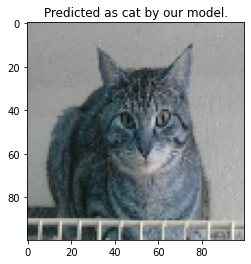

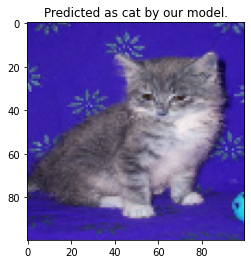

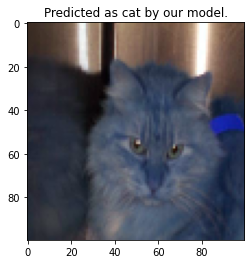

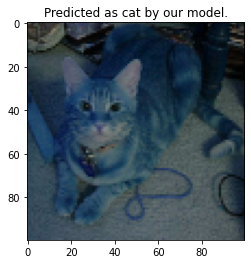

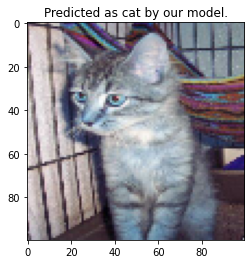

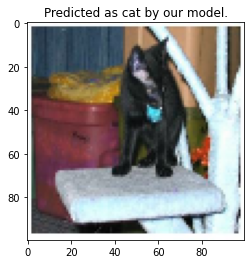

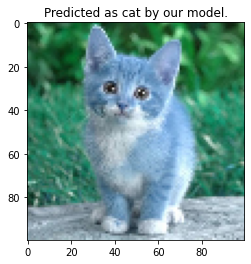

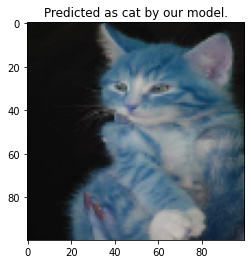

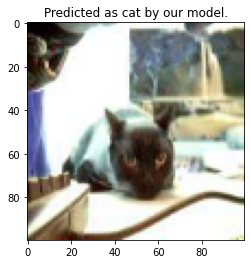

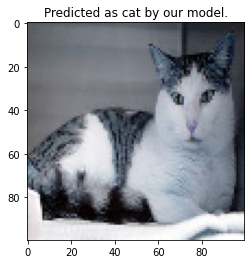

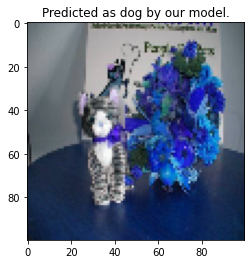

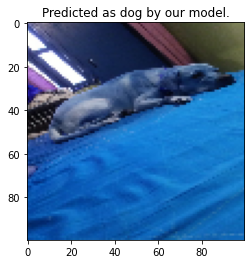

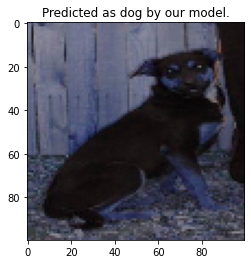

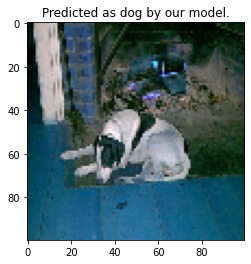

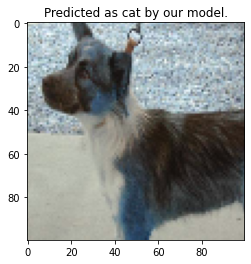

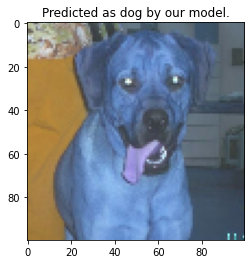

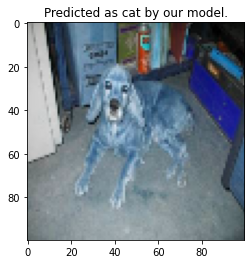

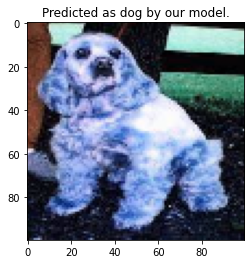

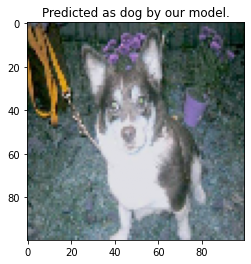

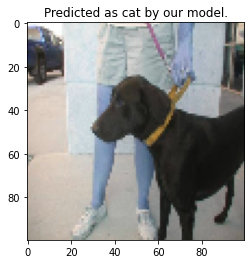

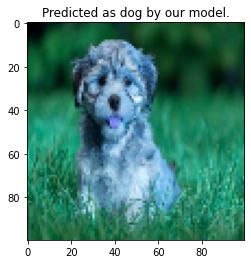

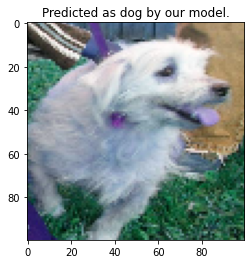

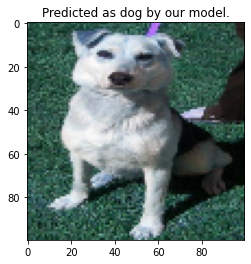

In [171]:
i=0
for img in X_test:
    plt.imshow(img)
    plt.title('Predicted as ' + rss[i] + ' by our model.')
    plt.show()
    i+=1

Above is shown the list of images with the we used to test our model.

In [172]:
def accuracy_(real_name,predicted_name):
    x=len(real_name)
    y=0
    for i in range(x):
        if real_name[i] != predicted_name[i]:
            y+=1
    return (x-y)/x
    

In [173]:
print(accuracy_(real_label,rss))

0.8260869565217391


## Our model is givingthe accuracy of 82.60%